In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# read data from file
data = np.genfromtxt("advertising.csv", delimiter=',', skip_header=True)
n = data.shape[0]
X = data[:, :3]
y = data[:,3]

In [3]:
# normalize inputdata
def input_normal(x_data):
    x_min = np.min(x_data, axis = 0)
    x_max= np.max(x_data, axis = 0)
    x_mean = np.mean(x_data, axis = 0)
    x_data_a = np.round((x_data - x_mean)/(x_max - x_min),4)
    x_data_new = np.insert(x_data_a, 0, 1, axis = 1)
    return x_data_new, x_min, x_max, x_mean

## Stochastic

In [4]:
def huber_loss(y_hat, y, delta = 1):
    if np.all(abs(y_hat - y)) <= delta:
        loss = (y_hat - y)**2
    else:
        loss = delta*abs(y_hat - y) - (delta**2)/2
    return loss

def compute_gradient_huber_loss(xi, y_hat, y, delta = 1):
    if np.all(abs(y_hat - y)) <= delta:
        gradient = 2*xi*(y_hat - y)
    else:
        gradient = delta*xi*((y_hat - y)/np.abs(y_hat - y))
    return gradient

In [5]:
def stochastic_gradient_descent(x_data, y_data, lr = 1e-5, n_epoch = 50):
    # take random number and keep them unchanging
    rng = np.random.default_rng(123)

    # create a matrix 4x1 with random number
    theta = rng.random((x_data.shape[1], 1)) # b, w1, w2, w3
    losses = []
    n = x_data.shape[0]
    for _ in range(n_epoch):
        for i in range(n):
            xi = x_data[i:i+1,]
            yi = y_data[i]

            # compute out
            y_hat = np.dot(xi,theta)

            # compute loss li
            loss = huber_loss(y_hat, yi, delta = 1)

            # compute gradient for loss
            dl = compute_gradient_huber_loss(xi, y_hat, yi, delta = 1)

            # update weight
            theta = theta - lr*dl.T

            #logging
            losses.append(loss.item())
    return theta, losses

[[15.17609421]
 [16.13797832]
 [ 5.32447269]
 [-0.07898608]]
[452.63729889771884, 84.6145493661784, 109.23364462273626, 216.4702036277849, 260.2858903559111, 21.281678793009362, 90.67535919683559, 119.6993045403244, 6.510590085060415, 174.9943563398257, 96.95895165575416, 207.47894415513596, 30.631908118870907, 107.95924522407311, 229.60846542102803, 326.3956184533501, 56.758937704649725, 380.38809340742034, 42.49245503167107, 91.97684043653166, 156.1260544654262, 150.43107892132258, 0.005171877003750565, 218.7326454541343, 15.679329028790585, 122.54180021255618, 75.60484947047821, 206.44578492783327, 142.09798652723182, 13.050154792063518, 192.5300770337186, 21.087114700627453, 36.76921041364128, 94.8170540120938, 20.792454557836184, 96.89146520282584, 287.18791162745964, 37.856346572694825, 3.2323578754346145, 155.6822244147956, 57.407781745483206, 61.2663473387508, 123.53848779792263, 72.61307577522642, 0.4306278204123845, 41.7179538220858, 1.7330073193958349, 167.80227144031483, 91

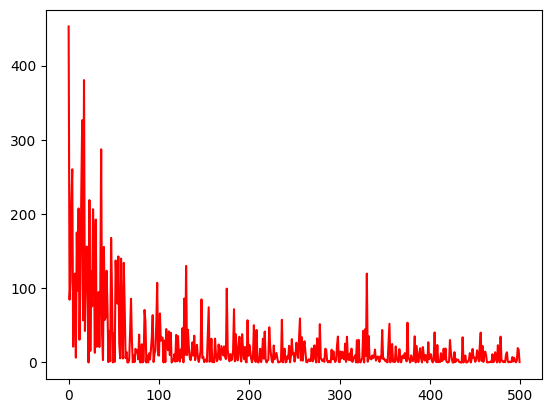

In [6]:
x_data_n, x_min, x_max, x_mean = input_normal(X)
sgd_theta, losses = stochastic_gradient_descent (x_data_n , y, lr = 0.01, n_epoch = 50 )
print(sgd_theta)
x_axis = list(range(500))
print(losses[:500])
plt.plot(x_axis, losses[:500], color = 'r')
plt.show()

In [7]:
sgd_theta, losses = stochastic_gradient_descent (x_data_n , y, lr = 0.01, n_epoch = 1 )
print(sum(losses))

9432.386833823315


## mini batch

In [8]:
rng = np.random.default_rng(123)
numbers = np.arange(0,200)
rng.shuffle(numbers)
x_data_sh = x_data_n[numbers]
x_data_sh [:5]

array([[ 1.    , -0.4726,  0.0975,  0.0954],
       [ 1.    ,  0.2024, -0.2997, -0.0365],
       [ 1.    , -0.3725,  0.3092,  0.3082],
       [ 1.    , -0.4127, -0.2473, -0.0075],
       [ 1.    , -0.0255, -0.4267, -0.0348]])

In [9]:
# compute huberloss fucntion
def huber_loss(y_hat, y, delta = 1):
    if np.any(abs(y_hat - y)) <= delta:
        loss = np.dot((y_hat - y).T,(y_hat - y))
    else:
        loss = sum(delta*abs(y_hat - y) - (delta**2)/2)
    return loss

# compute gradient of huberloss fucntion
def compute_gradient_huber_loss(xi, y_hat, y, delta = 1):
    if np.any(abs(y_hat - y)) <= delta:
        gradient = 2*np.dot(xi.T,(y_hat - y))
    else:
        gradient = sum(delta*np.dot(xi.T,((y_hat - y)/np.abs(y_hat - y))))
    return gradient

In [10]:
def mini_batch_gradient_descent(x_data, y_data, lr = 1e-5, n_epoch = 50, mini_batch=20):
    n = x_data.shape[0]
    delta = 1

    # take random number and keep them unchanging
    rng = np.random.default_rng(123)

    # create a matrix 4x1 with random number
    theta = rng.random((x_data.shape[1], 1)) # b, w1, w2, w3

    # create an array of shuffle indices in random 
    shuffled_indices = np.arange(0,n)
    rng.shuffle(shuffled_indices)

    x_shuffled_data = x_data[shuffled_indices]
    y_shuffled_data = y_data[shuffled_indices]

    # inlitialize a log
    theta_path = [theta]
    losses = []

    for epoch in range(n_epoch):
        for i in range(n//mini_batch + 1):
            m_batch = mini_batch
            if i == n//mini_batch:
                m_batch = n - (n//mini_batch)*mini_batch
                if m_batch == 0:
                    break
            xi = x_shuffled_data[i*mini_batch:(i*mini_batch + m_batch),:]
            yi = y_shuffled_data[i*mini_batch:(i*mini_batch + m_batch)].reshape(-1,1)

            # compute out
            y_hat = np.dot(xi,theta) #(mx1)

            # compute loss li mse
            #loss = np.dot((y_hat - yi).T,(y_hat - yi))/m_batch #(number)
            loss = huber_loss(y_hat, yi, delta)/m_batch

            # compute gradient for loss
            dl = compute_gradient_huber_loss(xi, y_hat, yi, delta)/m_batch
            
            # compute gradient for loss
            #dl = 2*np.dot(xi.T,(y_hat - yi))/m_batch

            # update weight
            theta = theta - lr*dl

            #logging
            theta_path.append(theta)
            losses.append(loss.item())
    return theta_path, losses

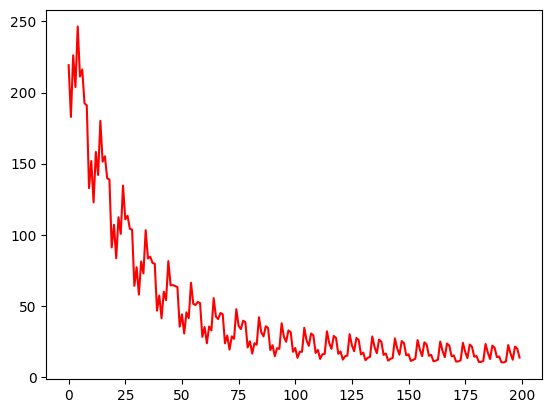

In [24]:
x_data_n, x_min, x_max, x_mean = input_normal(X)
sgd_theta, losses = mini_batch_gradient_descent(x_data_n , y, lr = 0.01, n_epoch = 50, mini_batch=20 )
a = 200
x_axis = list(range(a))
plt.plot(x_axis, losses[:a], color = 'r')
plt.show()

In [12]:
sgd_theta, losses = mini_batch_gradient_descent(x_data_n , y, lr = 0.01, n_epoch = 50, mini_batch=20 )
print(round(sum(losses),2))
print(losses[-1])

12438.06
6.153055870334198


## Batch

In [13]:
# compute huberloss fucntion
def huber_loss(y_hat, y, delta = 1):
    if np.any(abs(y_hat - y)) <= delta:
        loss = np.dot((y_hat - y).T,(y_hat - y))
    else:
        loss = sum(delta*abs(y_hat - y) - (delta**2)/2)
    return loss

# compute gradient of huberloss fucntion
def compute_gradient_huber_loss(xi, y_hat, y, delta = 1):
    if np.any(abs(y_hat - y)) <= delta:
        gradient = 2*np.dot(xi.T,(y_hat - y))
    else:
        gradient = sum(delta*np.dot(xi.T,((y_hat - y)/np.abs(y_hat - y))))
    return gradient

In [14]:
def batch_gradient_descent(x_data, y_data, lr = 1e-5, n_epoch = 50, delta = 1):
    n = x_data.shape[0]

    # take random number and keep them unchanging
    rng = np.random.default_rng(123)

    # create a matrix 4x1 with random number
    theta = rng.random((x_data.shape[1], 1)) # b, w1, w2, w3

    # create an array of shuffle indices in random 
    shuffled_indices = np.arange(0,n)
    rng.shuffle(shuffled_indices)

    x_shuffled_data = x_data[shuffled_indices]
    y_shuffled_data = y_data[shuffled_indices].reshape(-1,1)

    # inlitialize a log
    theta_path = [theta]
    losses = []

    for epoch in range(n_epoch):
        # compute out
        y_hat = np.dot(x_shuffled_data,theta) #(mx1)

        # compute loss li mse
        #loss = np.dot((y_hat - y_shuffled_data).T,(y_hat - y_shuffled_data))/n #(number)
        loss = huber_loss(y_hat, y_shuffled_data, delta)/n

        # compute gradient for loss
        dl = compute_gradient_huber_loss(x_shuffled_data, y_hat, y_shuffled_data, delta)/n
        # compute gradient for loss
        #dl = 2*np.dot(x_shuffled_data.T,(y_hat - y_shuffled_data))/n

        # update weight
        theta = theta - lr*dl

        #logging
        theta_path.append(theta)
        losses.append(loss.item())
    return theta_path, losses

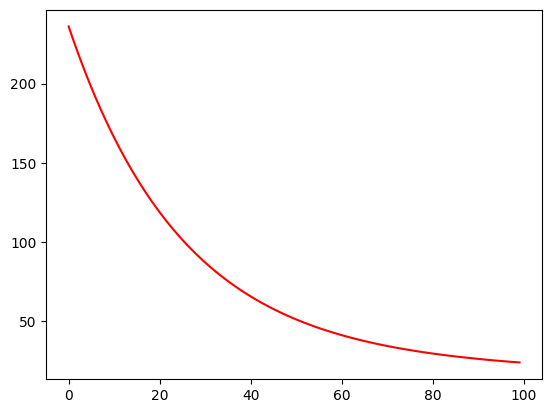

In [25]:
x_data_n, x_min, x_max, x_mean = input_normal(X)
sgd_theta, losses =batch_gradient_descent(x_data_n , y, lr = 0.01, n_epoch = 100, delta=1)
a = 100
x_axis = list(range(a))
plt.plot(x_axis, losses[:a], color = 'r')
plt.show()

In [16]:
sgd_theta, losses =batch_gradient_descent(x_data_n , y, lr = 0.01, n_epoch = 100, delta=0.5)
print(losses[-1])
print(round(sum(losses),2))

6.851575293378479
697.53
